In [1]:
# without further data processing

In [2]:
import pandas as pd
import os
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dir = './Shinhan Data/2022빅콘테스트_데이터분석리그_데이터분석분야_퓨처스부문_데이터셋_220908'

df = pd.read_csv(os.path.join(data_dir, 'main_df.csv'))

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
actual_test = df.loc[df['is_applied'].isna()]

In [6]:
df = df.dropna(subset=['is_applied'])
df = df.reset_index()
df.drop(['index'], axis=1, inplace=True)

In [7]:
df.loc[df['existing_loan_amt'] == 0, 'existing_loan_amt'] = 500000.0
df.loc[df['existing_loan_cnt'] == 0, 'existing_loan_amt'] = 0

In [8]:
df['insert_date'] = df.apply(lambda x: x.insert_time.split(' ')[0], axis=1)
df['loanapply_insert_time'] = df.apply(lambda x: x.insert_time.split(' ')[0], axis=1)
df['timestamp'] = df.apply(lambda x: x.insert_time.split(' ')[0], axis=1)

In [9]:
df['insert_time'] = pd.to_datetime(df['insert_time'], format='%Y-%m-%d %H:%M:%S', errors='ignore')
df['loanapply_insert_time'] = pd.to_datetime(df['loanapply_insert_time'], format='%Y-%m-%d %H:%M:%S', errors='ignore')
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='ignore')

df['date_cd'] = pd.to_datetime(df['date_cd'], format='%Y-%m-%d', errors='ignore')

In [10]:
df['insert_time_year'] = df['insert_time'].dt.year
df['insert_time_month'] = df['insert_time'].dt.month
df['insert_time_day'] = df['insert_time'].dt.day

df['loanapply_insert_time_year'] = df['loanapply_insert_time'].dt.year
df['loanapply_insert_time_month'] = df['loanapply_insert_time'].dt.month
df['loanapply_insert_time_day'] = df['loanapply_insert_time'].dt.day

df['timestamp_year'] = df['timestamp'].dt.year
df['timestamp_month'] = df['timestamp'].dt.month
df['timestamp_day'] = df['timestamp'].dt.day

df['date_cd_year'] = df['date_cd'].dt.year
df['date_cd_month'] = df['date_cd'].dt.month
df['date_cd_day'] = df['date_cd'].dt.day

df = df.drop(columns=['insert_time', 'loanapply_insert_time', 'timestamp', 'date_cd'])

In [11]:
df = df.drop_duplicates(keep='last')

In [12]:
train_df = df[:int(len(df) * 0.8)]
test_df = df[int(len(df) * 0.8):]

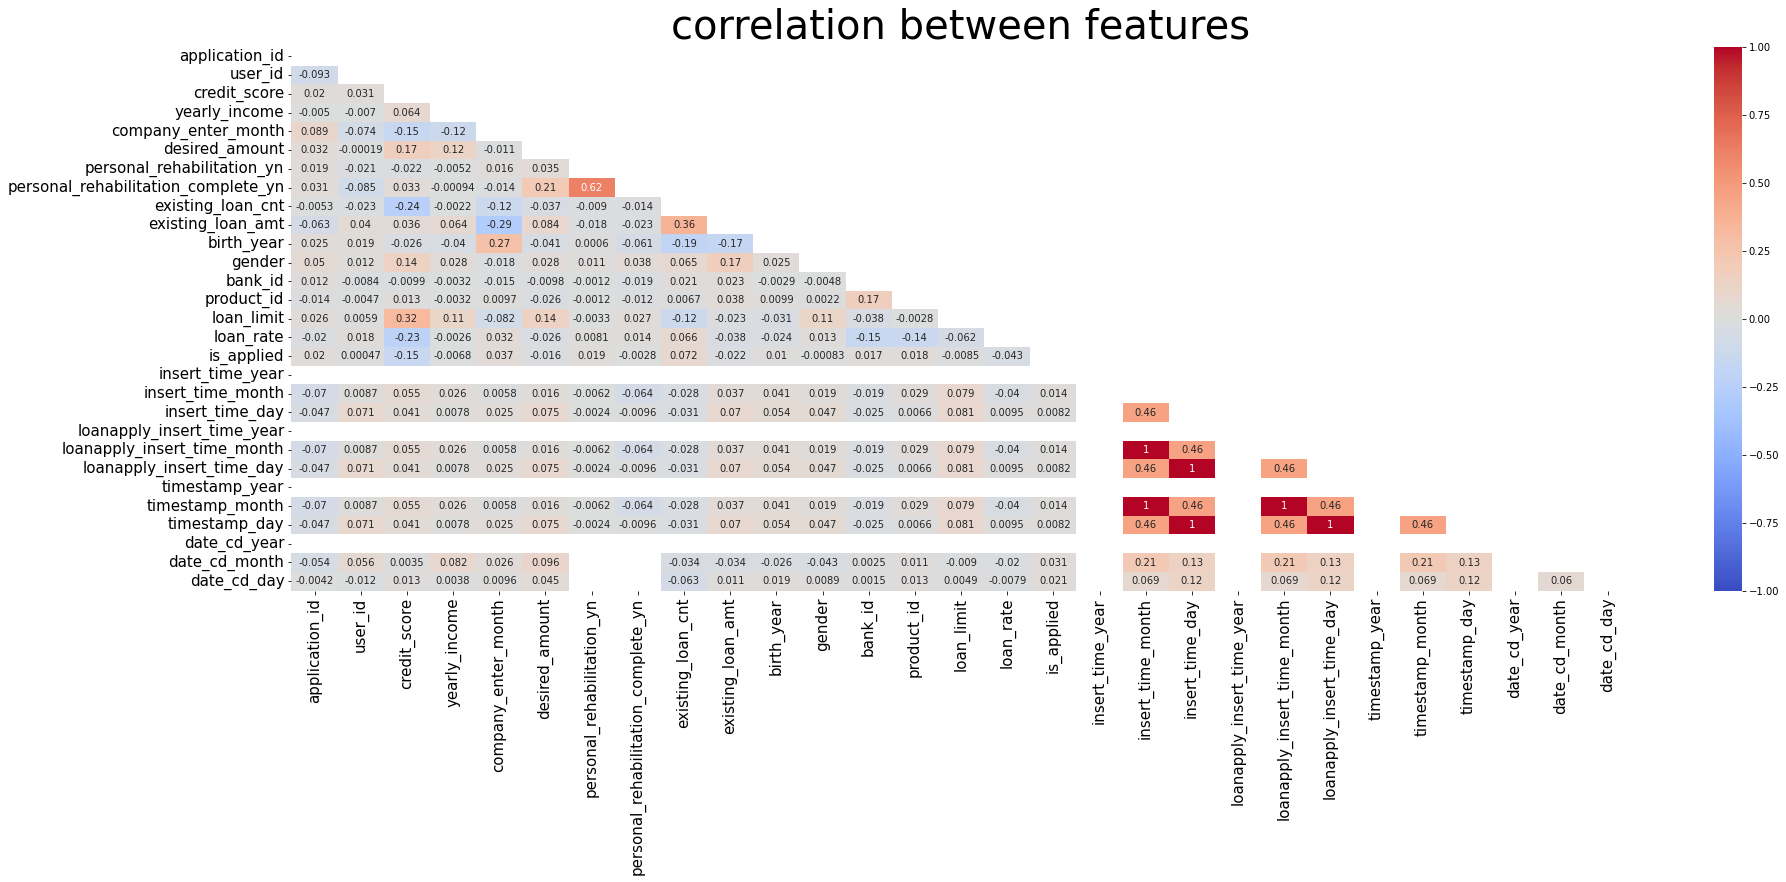

In [19]:
plt.figure(figsize=(30,10))

heat_table = train_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm', vmin=-1, vmax=1)
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=90)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [15]:
object_columns = df.columns[df.dtypes == 'object']

list(object_columns)

['income_type',
 'employment_type',
 'houseown_type',
 'purpose',
 'event',
 'mp_os',
 'mp_app_version',
 'insert_date']

In [16]:
from sklearn.preprocessing import LabelEncoder

enc = df.copy()

for i in object_columns:

    encoder = LabelEncoder()
    encoder.fit(enc[i])
    enc[i] = encoder.transform(enc[i])

enc

,application_id,user_id,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,...,insert_time_day,loanapply_insert_time_year,loanapply_insert_time_month,loanapply_insert_time_day,timestamp_year,timestamp_month,timestamp_day,date_cd_year,date_cd_month,date_cd_day
0,1864566,571161,670.0,81000000.0,0,201803.0,3,2,100000000.0,7,...,31,2022,5,31,2022,5,31,NaN,NaN,NaN
1,1864566,571161,670.0,81000000.0,0,201803.0,3,2,100000000.0,7,...,31,2022,5,31,2022,5,31,NaN,NaN,NaN
2,1864566,571161,670.0,81000000.0,0,201803.0,3,2,100000000.0,7,...,31,2022,5,31,2022,5,31,NaN,NaN,NaN
3,1864566,571161,670.0,81000000.0,0,201803.0,3,2,100000000.0,7,...,31,2022,5,31,2022,5,31,NaN,NaN,NaN
4,1864566,571161,670.0,81000000.0,0,201803.0,3,2,100000000.0,7,...,31,2022,5,31,2022,5,31,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135974,880562,760191,640.0,25000000.0,0,202101.0,3,3,3000000.0,6,...,2,2022,4,2,2022,4,2,2022.0,3.0,25.0
135975,880562,760191,640.0,25000000.0,0,202101.0,3,3,3000000.0,6,...,2,2022,4,2,2022,4,2,2022.0,3.0,25.0
135976,880562,760191,640.0,25000000.0,0,202101.0,3,3,3000000.0,6,...,2,2022,4,2,2022,4,2,2022.0,4.0,13.0
135977,880562,760191,640.0,25000000.0,0,202101.0,3,3,3000000.0,6,...,2,2022,4,2,2022,4,2,2022.0,4.0,13.0


In [17]:
y_train = train_df['is_applied']
x_train = train_df.drop(columns=['is_applied'])

In [18]:
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'EARNEDINCOME'

In [ ]:
y_test = test_df['is_applied']
x_test = test_df.drop(columns=['is_applied'])

In [ ]:
pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print('acc with 10 decision trees : {0:0.4f}'. format(accuracy_score(y_test, pred)))

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
imp = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=imp, y=imp.index)
plt.show()